In [117]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import seaborn as sns

import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [118]:
new_df = pd.read_csv('../Datasets/new_df.csv')

In [151]:
new_df = pd.read_csv('../Datasets/dfNaLinear.csv')
new_df = new_df.drop(columns = ["Unnamed: 0"])

In [153]:
new_df = new_df.drop(columns = ["sales_units"])
new_df = new_df.drop(['id'],axis=1)
#df_noNan = new_df.interpolate()

In [154]:
new_df['nweek'] = new_df['year_week'].map(lambda x: str(x)[-2:])
new_df['nweek'] = new_df['nweek'].astype(np.int64)
new_df['date'] = pd.to_datetime(new_df['date'])
new_df['year'], new_df['month'], new_df['day'] = new_df['date'].dt.year, new_df['date'].dt.month, new_df['date'].dt.day
new_df = new_df.drop(['date'],axis=1)
new_df = new_df.drop(columns=['year_week','month','day'])

In [155]:
new_df

,product_number,prod_category_1,prod_category_2,prod_category_3,prod_category_4,prod_category_5,prod_category_6,prod_category_7,specs,display_size,segment_1,segment_2,segment_3,setmana,inventory_units,nweek,year
0,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,19,35.0,19,2021
1,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,20,70.0,20,2021
2,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,21,137.0,21,2021
3,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,22,274.0,22,2021
4,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,23,333.0,23,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,14,45.0,14,2023
7705,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,15,38.0,15,2023
7706,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,16,54.0,16,2023
7707,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,17,172.0,17,2023


In [156]:
X = new_df.drop(columns=['inventory_units','setmana'])
Y = new_df['inventory_units']
X
Y

0        35.0
1        70.0
2       137.0
3       274.0
4       333.0
        ...  
7704     45.0
7705     38.0
7706     54.0
7707    172.0
7708    103.0
Name: inventory_units, Length: 7709, dtype: float64

In [157]:
X

,product_number,prod_category_1,prod_category_2,prod_category_3,prod_category_4,prod_category_5,prod_category_6,prod_category_7,specs,display_size,segment_1,segment_2,segment_3,nweek,year
0,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,19,2021
1,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,20,2021
2,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,21,2021
3,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,22,2021
4,6909,1,0,0,0,0,0,0,1,13.3,1,0,0,23,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,14,2023
7705,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,15,2023
7706,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,16,2023
7707,247737,1,0,0,0,0,0,0,100,13.3,1,0,0,17,2023


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X,Y,shuffle=True,random_state=69)

In [159]:
X_train

,product_number,prod_category_1,prod_category_2,prod_category_3,prod_category_4,prod_category_5,prod_category_6,prod_category_7,specs,display_size,segment_1,segment_2,segment_3,nweek,year
1061,25662,1,0,0,0,0,0,0,11,13.3,1,0,0,44,2021
6349,226023,0,0,0,0,1,0,0,88,15.6,0,1,0,35,2022
2238,62181,0,0,0,0,1,0,0,25,14.0,0,1,0,43,2022
2047,58233,1,0,0,0,0,0,0,23,13.3,1,0,0,42,2021
1066,25662,1,0,0,0,0,0,0,11,13.3,1,0,0,49,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,43428,0,0,0,0,1,0,0,17,15.6,0,1,0,17,2022
2667,80934,0,0,0,1,0,0,0,31,13.5,1,0,0,48,2022
4041,127323,0,0,1,0,0,0,0,50,15.6,0,0,1,10,2023
7371,239841,0,1,0,0,0,0,0,97,15.6,0,1,0,10,2023


In [170]:
import catboost as cb

file = open("best_params_xgboost_2.pkl",'rb')
gsc1_best_params_ = pickle.load(file)
file.close()

gsc1 = cb.CatBoostRegressor(iterations = 150,
                            loss_function='RMSE',
                            learning_rate = 0.2,
                            depth = 10,
                            )
gsc1.fit(X_train, y_train)

0:	learn: 69.9430033	total: 9.3ms	remaining: 1.39s
1:	learn: 68.3742265	total: 32.7ms	remaining: 2.42s
2:	learn: 67.4871743	total: 54.1ms	remaining: 2.65s
3:	learn: 66.5973297	total: 71.4ms	remaining: 2.61s
4:	learn: 65.9462425	total: 96.5ms	remaining: 2.8s
5:	learn: 65.2928488	total: 130ms	remaining: 3.13s
6:	learn: 64.8924870	total: 144ms	remaining: 2.94s
7:	learn: 64.4957469	total: 153ms	remaining: 2.72s
8:	learn: 64.2127506	total: 165ms	remaining: 2.58s
9:	learn: 63.8086530	total: 174ms	remaining: 2.43s
10:	learn: 63.4008918	total: 182ms	remaining: 2.3s
11:	learn: 63.2888124	total: 184ms	remaining: 2.11s
12:	learn: 63.0368985	total: 193ms	remaining: 2.04s
13:	learn: 62.7614740	total: 200ms	remaining: 1.95s
14:	learn: 62.6123957	total: 204ms	remaining: 1.84s
15:	learn: 62.3672757	total: 215ms	remaining: 1.8s
16:	learn: 62.1199013	total: 224ms	remaining: 1.75s
17:	learn: 61.9234156	total: 243ms	remaining: 1.78s
18:	learn: 61.7566726	total: 263ms	remaining: 1.81s
19:	learn: 61.5603351

In [171]:
y_predicted_test = gsc1.predict(X_test)
y_predicted_train = gsc1.predict(X_train)

rms_test = mean_squared_error(y_test, y_predicted_test, squared=False)
rms_train = mean_squared_error(y_train, y_predicted_train, squared=False)
print(f'train: {rms_train}\ntest: {rms_test}')

train: 49.518615192199555
test: 63.565683794419044


train: 45
test: 78
gsc1 = cb.CatBoostRegressor(iterations = 100,
                            loss_function='RMSE',
                            learning_rate = 0.1,
                            depth = 16,
                            )


train: 89
test: 97
gsc1 = cb.CatBoostRegressor(iterations = 100,
                            loss_function='RMSE',
                            learning_rate = 0.01,
                            depth = 16,
                            )

train: 29
test: 76


In [172]:
test_df = pd.read_csv("../Datasets/test.csv")

In [173]:
test_df["year"] = test_df["id"].apply(lambda x: x[:4]).astype(np.int64)
test_df["nweek"] = test_df["id"].apply(lambda x: x[4:6]).astype(np.int64)
test_df["product_number"] = test_df["id"].apply(lambda x: x.split('-')[1]).astype(np.int64)

In [174]:
test_df

,id,year,nweek,product_number
0,202319-105609,2023,19,105609
1,202319-107583,2023,19,107583
2,202319-10857,2023,19,10857
3,202319-109557,2023,19,109557
4,202319-112518,2023,19,112518
...,...,...,...,...
1295,202331-92778,2023,31,92778
1296,202331-93765,2023,31,93765
1297,202331-94752,2023,31,94752
1298,202331-9870,2023,31,9870


In [175]:
df_merge = X.drop(columns = ["nweek", "year"])
df_merge = df_merge.drop_duplicates()
test_df = test_df.reset_index().merge(df_merge,on=['product_number']).set_index('index')

In [176]:
test_df

,id,year,nweek,product_number,prod_category_1,prod_category_2,prod_category_3,prod_category_4,prod_category_5,prod_category_6,prod_category_7,specs,display_size,segment_1,segment_2,segment_3
index,,,,,,,,,,,,,,,,
0,202319-105609,2023,19,105609,0,1,0,0,0,0,0,43,15.6,0,0,1
100,202320-105609,2023,20,105609,0,1,0,0,0,0,0,43,15.6,0,0,1
200,202321-105609,2023,21,105609,0,1,0,0,0,0,0,43,15.6,0,0,1
300,202322-105609,2023,22,105609,0,1,0,0,0,0,0,43,15.6,0,0,1
400,202323-105609,2023,23,105609,0,1,0,0,0,0,0,43,15.6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,202327-99687,2023,27,99687,0,0,0,0,1,0,0,42,15.6,0,1,0
999,202328-99687,2023,28,99687,0,0,0,0,1,0,0,42,15.6,0,1,0
1099,202329-99687,2023,29,99687,0,0,0,0,1,0,0,42,15.6,0,1,0


In [177]:
test_df = test_df.sort_index()

In [178]:
test_df.dtypes

id                  object
year                 int64
nweek                int64
product_number       int64
prod_category_1      int64
prod_category_2      int64
prod_category_3      int64
prod_category_4      int64
prod_category_5      int64
prod_category_6      int64
prod_category_7      int64
specs                int64
display_size       float64
segment_1            int64
segment_2            int64
segment_3            int64
dtype: object

In [179]:
test_df = test_df[X.columns]

In [180]:
#test_df = test_df.drop(columns = ["id"])

KeyError: "['id'] not found in axis"

In [181]:
test_df

,product_number,prod_category_1,prod_category_2,prod_category_3,prod_category_4,prod_category_5,prod_category_6,prod_category_7,specs,display_size,segment_1,segment_2,segment_3,nweek,year
index,,,,,,,,,,,,,,,
0,105609,0,1,0,0,0,0,0,43,15.6,0,0,1,19,2023
1,107583,0,0,0,0,1,0,0,44,15.6,0,1,0,19,2023
2,10857,0,0,1,0,0,0,0,5,15.6,0,0,1,19,2023
3,109557,0,1,0,0,0,0,0,45,14.0,0,1,0,19,2023
4,112518,0,0,0,1,0,0,0,46,15.6,1,0,0,19,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,92778,0,1,0,0,0,0,0,39,14.0,0,1,0,31,2023
1296,93765,1,0,0,0,0,0,0,40,14.0,1,0,0,31,2023
1297,94752,0,0,0,0,1,0,0,41,14.0,0,1,0,31,2023


In [182]:
y_predicted_test = gsc1.predict(test_df)
test_df_just_for_id = pd.read_csv('../Datasets/test.csv')
#test_df_just_for_id[test_df_just_for_id['id'] == str(f'202327-99687')]

<AxesSubplot:ylabel='Count'>

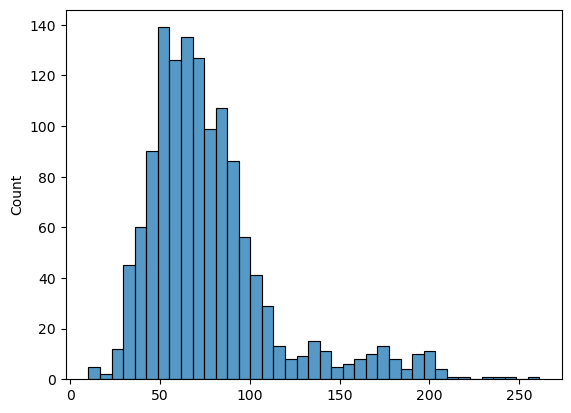

In [183]:
import seaborn as sns
sns.histplot(y_predicted_test)

<AxesSubplot:ylabel='Count'>

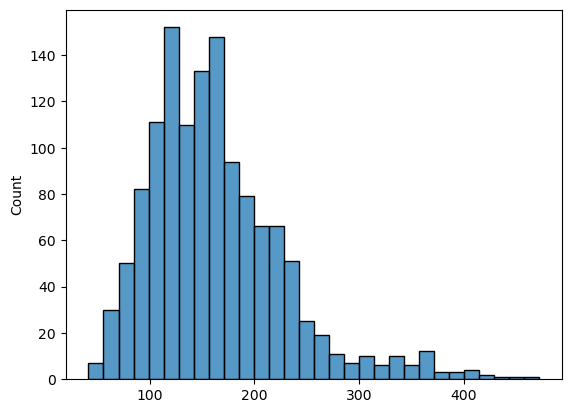

In [142]:
import seaborn as sns
sns.histplot(y_predicted_test)

In [184]:
submission = pd.DataFrame({
    'id' : test_df_just_for_id.id,
    'inventory_units' : y_predicted_test
})
submission

,id,inventory_units
0,202319-105609,46.856708
1,202319-107583,64.222834
2,202319-10857,66.967431
3,202319-109557,75.271131
4,202319-112518,47.021400
...,...,...
1295,202331-92778,83.612434
1296,202331-93765,66.116953
1297,202331-94752,171.819739
1298,202331-9870,78.097657


In [144]:
submission.to_csv('../submissions/submission3.csv', index = False)

In [145]:
submission

,id,inventory_units
0,202319-105609,75.387222
1,202319-107583,233.629459
2,202319-10857,172.483441
3,202319-109557,113.225542
4,202319-112518,193.270735
...,...,...
1295,202331-92778,130.863291
1296,202331-93765,119.839404
1297,202331-94752,150.681563
1298,202331-9870,135.945228


In [148]:
pickle.dump(gsc1, open('../checkpoints/model_catboost.pkl', 'wb'))